In [1]:
import astropy.units as u
from dysh.fits.gbtfitsload import GBTFITSLoad
from dysh.util.download import from_url
from pathlib import Path

In [2]:
url = "http://www.gb.nrao.edu/dysh/example_data/positionswitch/data/AGBT05B_047_01/AGBT05B_047_01.raw.acs/AGBT05B_047_01.raw.acs.fits"
savepath = Path.cwd() / "data"
filename = from_url(url, savepath)

Starting download...
AGBT05B_047_01.raw.acs.fits already downloaded at /users/esmith/Git/dysh/notebooks/examples/data


In [3]:
sdfits = GBTFITSLoad(filename)
sdfits.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,51,NGC5291,4386.0,OnOff,1,1.420405,1.420405,1,2,11,1,198.343112,18.64274
1,52,NGC5291,4386.0,OnOff,2,1.420405,1.420405,1,2,11,1,198.930571,18.787219
2,53,NGC5291,4386.0,OnOff,1,1.420405,1.420405,1,2,11,1,199.330491,18.356075
3,54,NGC5291,4386.0,OnOff,2,1.420405,1.420405,1,2,11,1,199.915725,18.492742
4,55,NGC5291,4386.0,OnOff,1,1.420405,1.420405,1,2,11,1,200.304237,18.057533
5,56,NGC5291,4386.0,OnOff,2,1.420405,1.420405,1,2,11,1,200.890603,18.186034
6,57,NGC5291,4386.0,OnOff,1,1.420405,1.420405,1,2,11,1,202.327548,17.385267
7,58,NGC5291,4386.0,OnOff,2,1.420405,1.420405,1,2,11,1,202.919161,17.494902


In [4]:
psscan = sdfits.getps(scan=51, ifnum=0, plnum=0)

In [5]:
ta = psscan.timeaverage()

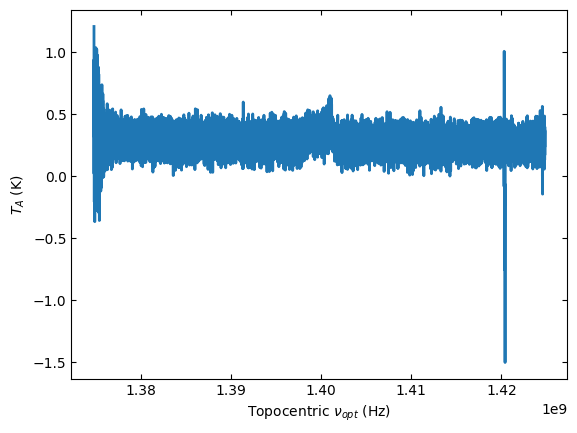

In [6]:
ta.plot()

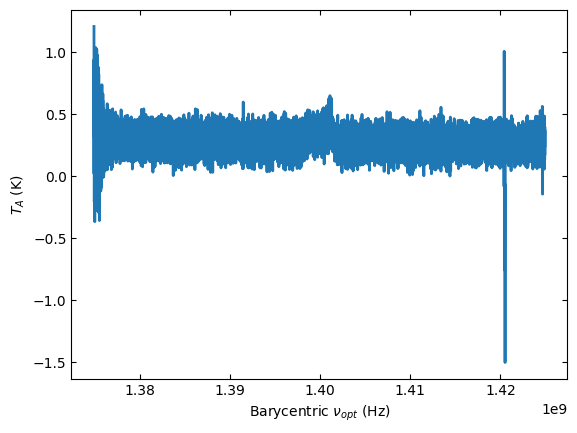

In [7]:
ta.plot(vel_frame='icrs')

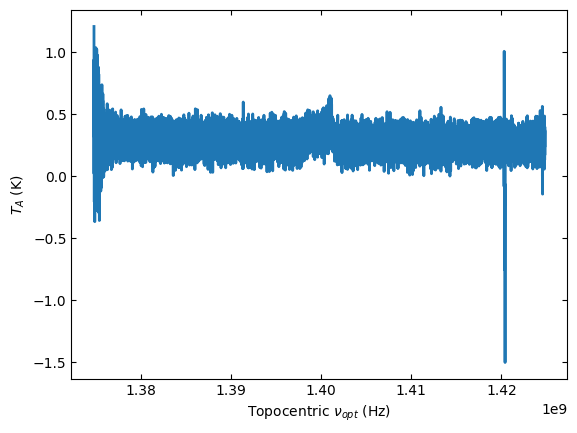

In [8]:
ta.plot(vel_frame='topo')

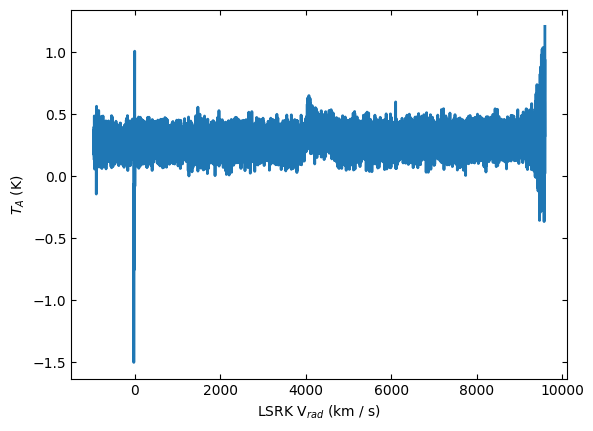

In [9]:
ta.plot(vel_frame='lsrk', doppler_convention='radio', xaxis_unit='km/s')

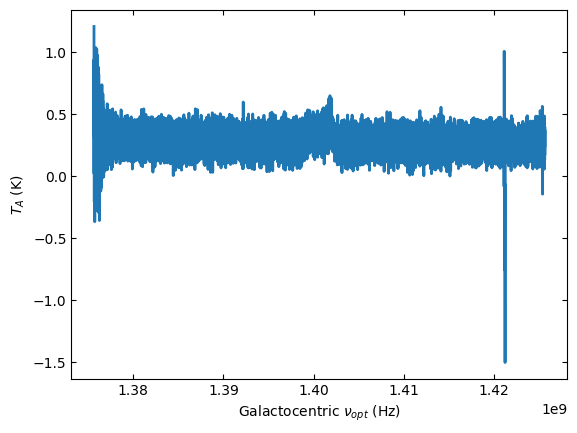

The new spectral axis frame is galactocentric


In [10]:
newspec = ta.with_frame('galactocentric')
newspec.plot()
print(f"The new spectral axis frame is {newspec.velocity_frame}")

In [11]:
ta.spectral_axis-newspec.spectral_axis

<Quantity [-739985.35192394, -739984.55945134, -739983.76697898, ...,
           -714019.99327397, -714019.20080161, -714018.40832925] Hz>

In [12]:
sa = ta.spectral_axis
ta.set_frame('gcrs')
print(f"Changed spectral axis frame to  {ta.velocity_frame}")

Changed spectral axis frame to  gcrs


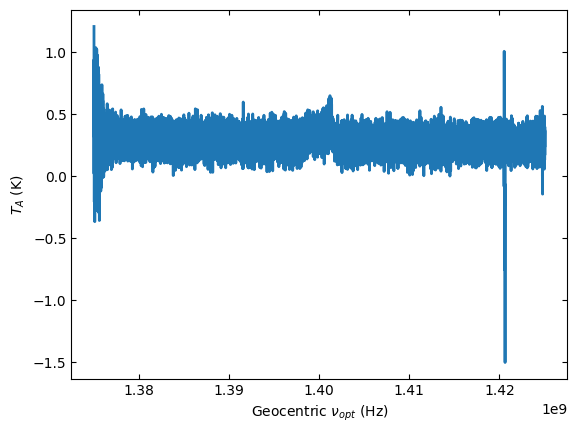

In [13]:
ta.plot()

In [14]:
ta.spectral_axis - sa

<Quantity [130439.90644622, 130439.76675415, 130439.62706208, ...,
           125862.89834142, 125862.75864935, 125862.61895752] Hz>

In [15]:
ta.velocity_axis_to(unit="pc/Myr", toframe='heliocentric', doppler_convention='radio')

<SpectralAxis 
   (observer: <HCRS Coordinate (obstime=J2000.000): (x, y, z) in m
                  (1.61868448e+10, -1.38360865e+11, -6.00311052e+10)
               (v_x, v_y, v_z) in km / s
                  (0., 0., 0.)>
    target: <FK5 Coordinate (equinox=J2000.000): (ra, dec, distance) in (deg, deg, kpc)
                (206.85210758, -30.40701531, 1000000.)
             (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
                (4.68402043e-20, -4.68402043e-20, 4386.)>
    observer to target (computed from above):
      radial_velocity=4385.9999493050655 km / s
      redshift=0.014738724420438443
    doppler_rest=1420405000.0 Hz
    doppler_convention=radio)
  [-977.0111474 , -976.6817525 , -976.3523576 , ..., 9815.61275556,
   9815.94215046, 9816.27154536] pc / Myr>

In [16]:
print(f"before shift {ta.spectral_axis}")
ta.shift_spectrum_to(radial_velocity=0*u.km/u.s)
print(f"after shift {ta.spectral_axis}")

before shift [1.42493124e+09 1.42492971e+09 1.42492819e+09 ... 1.37493180e+09
 1.37493028e+09 1.37492875e+09] Hz
after shift [1.44593291e+09 1.44593136e+09 1.44592981e+09 ... 1.39519654e+09
 1.39519500e+09 1.39519345e+09] Hz


In [17]:
ta.wavelength.to('cm')

<SpectralAxis 
   (observer: <HCRS Coordinate (obstime=J2000.000): (ra, dec, distance) in (deg, deg, m)
                  (276.67270417, -23.31287413, 1.51688749e+11)
               (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
                  (0., 0., 0.)>
    target: <FK5 Coordinate (equinox=J2000.000): (ra, dec, distance) in (deg, deg, kpc)
                (206.85210758, -30.40701531, 1000000.)
             (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
                (3.9476915e-18, -6.47243551e-19, 5.0694932e-05)>
    observer to target (computed from above):
      radial_velocity=3.111035734582046e-13 km / s
      redshift=0.0
    doppler_rest=1420405000.0 Hz
    doppler_convention=optical)
  [20.73349712, 20.73351932, 20.73354153, ..., 21.48747137, 21.48749522,
   21.48751906] cm>

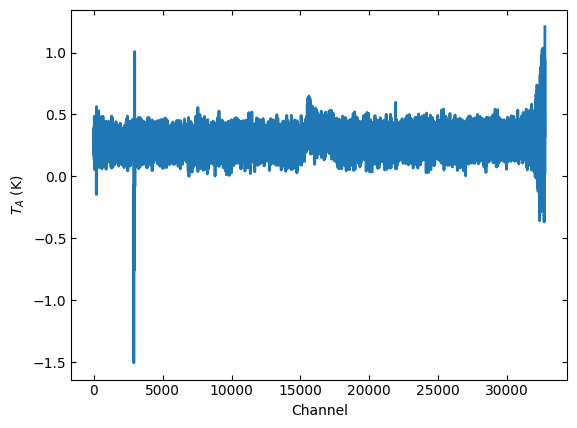

In [18]:
ta.plot(xaxis_unit='chan')